### Import the necessary libraries for the analysis

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

__Loading the dataset from the our scraped files__

In [103]:
df = pd.read_csv('matches_1000.csv')

__Creating a copy for backup__

In [104]:
df1 = df.copy()

__Dimension of the dataset__

In [105]:
df.shape

(1000, 95)

__Display the column names__

In [106]:
df.columns

Index(['match_id', 'start_time', 'radiant_team_id', 'radiant_name',
       'dire_team_id', 'dire_name', 'leagueid', 'league_name', 'series_type',
       'radiant_win', 'region', 'team2_ban1', 'team1_ban1', 'team1_ban2',
       'team2_ban2', 'team1_ban3', 'team1_ban4', 'team2_ban3', 'team2_hero1',
       'team1_hero1', 'team2_ban4', 'team2_ban5', 'team1_ban5', 'team1_hero2',
       'team2_hero2', 'team2_hero3', 'team1_hero3', 'team1_hero4',
       'team2_hero4', 'team2_ban6', 'team1_ban6', 'team1_ban7', 'team2_ban7',
       'team2_hero5', 'team1_hero5', 'team1_id', 'team1_rating', 'team1_wins',
       'team1_losses', 'team1_last_match_time', 'team2_id', 'team2_rating',
       'team2_wins', 'team2_losses', 'team2_last_match_time',
       'team1_player1_id', 'team1_player1_gamesPlayed', 'team1_player1_wins',
       'team1_player2_id', 'team1_player2_gamesPlayed', 'team1_player2_wins',
       'team1_player3_id', 'team1_player3_gamesPlayed', 'team1_player3_wins',
       'team1_player4_id', 

__Datatypes of each feature of the dataset__

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 95 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   match_id                   1000 non-null   int64  
 1   start_time                 1000 non-null   int64  
 2   radiant_team_id            985 non-null    float64
 3   radiant_name               969 non-null    object 
 4   dire_team_id               984 non-null    float64
 5   dire_name                  969 non-null    object 
 6   leagueid                   1000 non-null   int64  
 7   league_name                1000 non-null   object 
 8   series_type                1000 non-null   int64  
 9   radiant_win                1000 non-null   bool   
 10  region                     968 non-null    float64
 11  team2_ban1                 982 non-null    float64
 12  team1_ban1                 982 non-null    float64
 13  team1_ban2                 982 non-null    float6

#### Top 5 Rows of our Dataset

In [108]:
df.head()

,match_id,start_time,radiant_team_id,radiant_name,dire_team_id,dire_name,leagueid,league_name,series_type,radiant_win,...,team2_hero1_gamesPlayed,team2_hero1_wins,team2_hero2_gamesPlayed,team2_hero2_wins,team2_hero3_gamesPlayed,team2_hero3_wins,team2_hero4_gamesPlayed,team2_hero4_wins,team2_hero5_gamesPlayed,team2_hero5_wins
0,7661061658,1711737025,9389538.0,Dominion,9360721.0,KIBA ARMS,15901,Ultras Dota Pro League 2023-24,1,True,...,8.0,5.0,4.0,2.0,10.0,5.0,1.0,0.0,2.0,1.0
1,7661047871,1711736470,9374214.0,dungeon masters,NaN,NaN,16251,Party To Play league,0,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7660964485,1711733383,9368468.0,Rest Farmers,9303665.0,NextUp,16343,RES - Regional Series EU #1,1,True,...,1.0,0.0,2.0,0.0,10.0,2.0,7.0,1.0,4.0,1.0
3,7660960370,1711733071,NaN,NaN,NaN,NaN,16251,Party To Play league,0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7660955908,1711732905,9303383.0,L1GA TEAM,9017006.0,NAVI Junior,16527,Portal Dota2 World Invitationals,1,True,...,16.0,8.0,7.0,2.0,10.0,3.0,14.0,8.0,5.0,2.0


In [109]:
df.describe()

,match_id,start_time,radiant_team_id,dire_team_id,leagueid,series_type,region,team2_ban1,team1_ban1,team1_ban2,...,team2_hero1_gamesPlayed,team2_hero1_wins,team2_hero2_gamesPlayed,team2_hero2_wins,team2_hero3_gamesPlayed,team2_hero3_wins,team2_hero4_gamesPlayed,team2_hero4_wins,team2_hero5_gamesPlayed,team2_hero5_wins
count,1.000000e+03,1.000000e+03,9.850000e+02,9.840000e+02,1000.000000,1000.000000,968.000000,982.000000,982.000000,982.000000,...,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,7.653690e+09,1.711338e+09,8.262297e+06,8.238466e+06,16185.148000,1.024000,6.422521,72.303462,71.229124,68.000000,...,55.660000,28.913684,51.255789,26.644211,41.923158,21.922105,41.730526,21.841053,38.104211,19.845263
std,4.316900e+06,2.319333e+05,2.198489e+06,2.274647e+06,246.919192,0.288977,6.473411,33.599026,33.463133,34.115054,...,80.967914,40.733979,79.549051,40.842804,60.985301,32.090169,60.606011,32.566039,55.140196,29.021889
min,7.646023e+09,1.710925e+09,5.000000e+00,5.000000e+00,15819.000000,0.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,7.649674e+09,1.711128e+09,8.629014e+06,8.629014e+06,15901.000000,1.000000,3.000000,49.000000,49.000000,43.000000,...,7.000000,4.000000,7.000000,4.000000,6.000000,3.000000,5.000000,3.000000,4.000000,2.000000
50%,7.654169e+09,1.711356e+09,8.894818e+06,8.957156e+06,16249.500000,1.000000,3.000000,72.500000,66.000000,66.000000,...,24.000000,12.000000,20.000000,11.000000,18.000000,9.000000,17.000000,8.000000,15.000000,7.000000
75%,7.657224e+09,1.711533e+09,9.330492e+06,9.330485e+06,16390.000000,1.000000,8.000000,98.000000,98.000000,98.000000,...,75.000000,39.000000,63.000000,33.000000,53.000000,28.000000,50.000000,25.750000,51.750000,27.000000
max,7.661062e+09,1.711737e+09,9.389538e+06,9.389538e+06,16527.000000,2.000000,38.000000,137.000000,138.000000,137.000000,...,461.000000,226.000000,548.000000,266.000000,548.000000,266.000000,548.000000,266.000000,548.000000,266.000000


#### Changing the Datatype

In [110]:
df['start_time'] = pd.to_datetime(df['start_time'], unit='s')
df['team1_last_match_time'] = pd.to_datetime(df['team1_last_match_time'], unit='s')
df['team2_last_match_time'] = pd.to_datetime(df['team2_last_match_time'], unit='s')
# df['region'] = df['region'].astype('category')

#### Checking the Null Values

In [111]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 match_id                    0
start_time                  0
radiant_team_id            15
radiant_name               31
dire_team_id               16
                           ..
team2_hero3_wins           50
team2_hero4_gamesPlayed    50
team2_hero4_wins           50
team2_hero5_gamesPlayed    50
team2_hero5_wins           50
Length: 95, dtype: int64


#### Checking the Duplicate Values

In [112]:
duplicate_rows = df.duplicated().sum()
print("Duplicate Rows:", duplicate_rows)

Duplicate Rows: 0


#### Dropping the Match id Because its not Required

In [113]:
df.drop(columns=['match_id'], inplace=True)

#### Imputing the Null Values

In [114]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].mean(), inplace=True)

#### Correlation Matrix

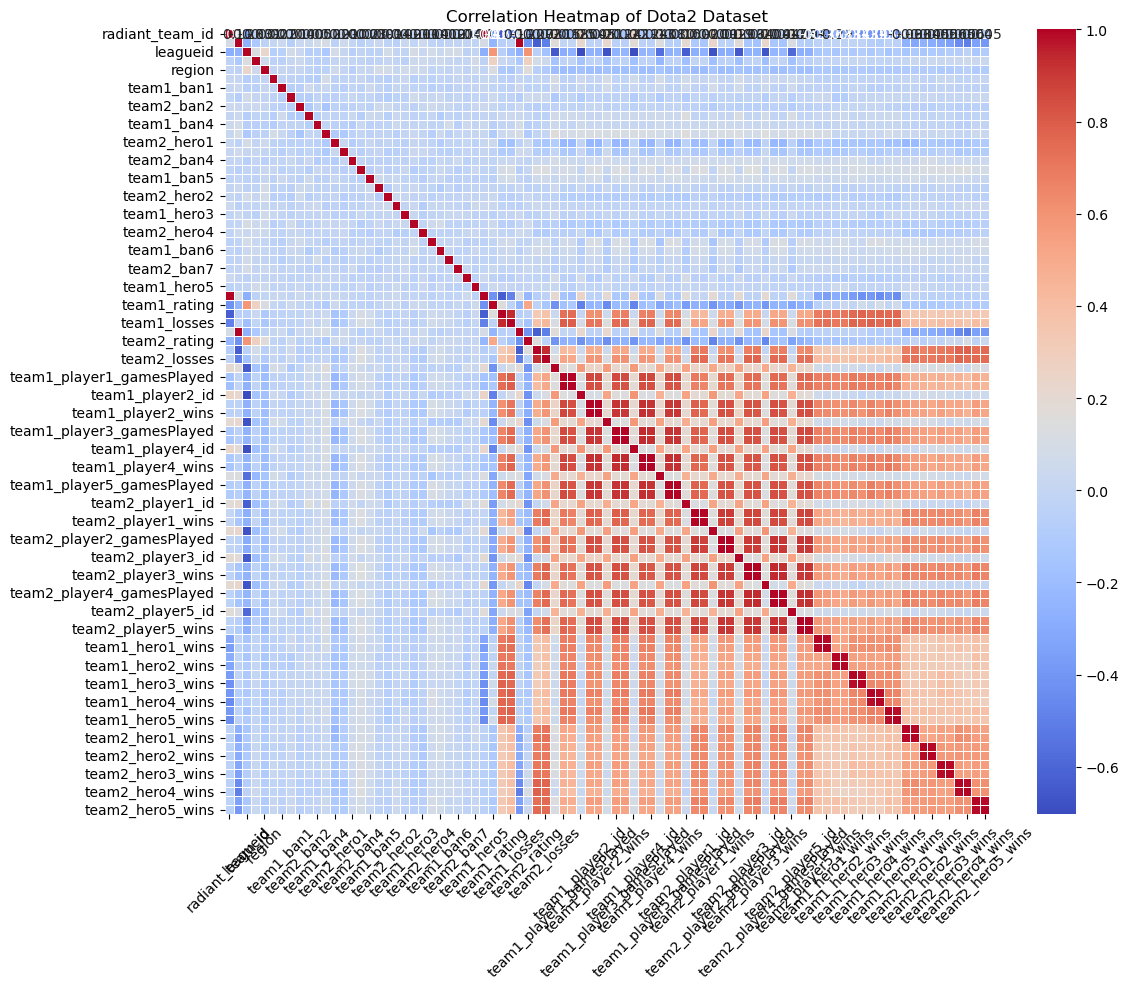

In [115]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Dota2 Dataset')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

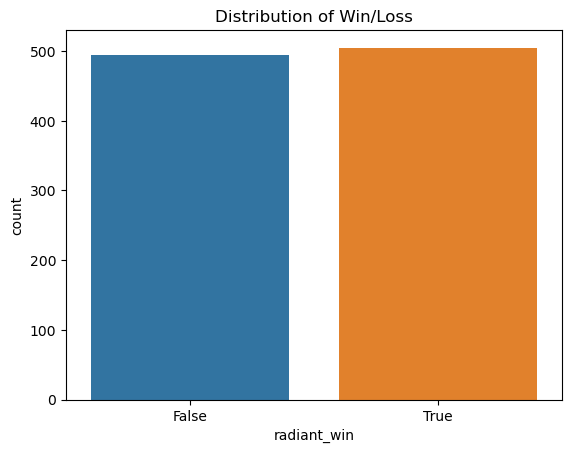

In [116]:
sns.countplot(x='radiant_win', data=df)
plt.title('Distribution of Win/Loss')
plt.show()

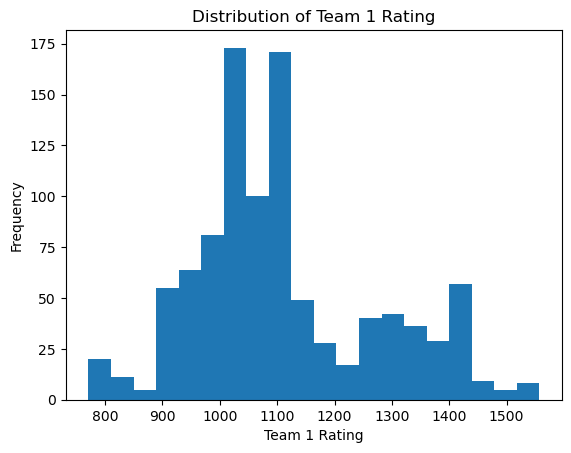

In [117]:
plt.hist(df['team1_rating'], bins=20)
plt.xlabel('Team 1 Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Team 1 Rating')
plt.show()

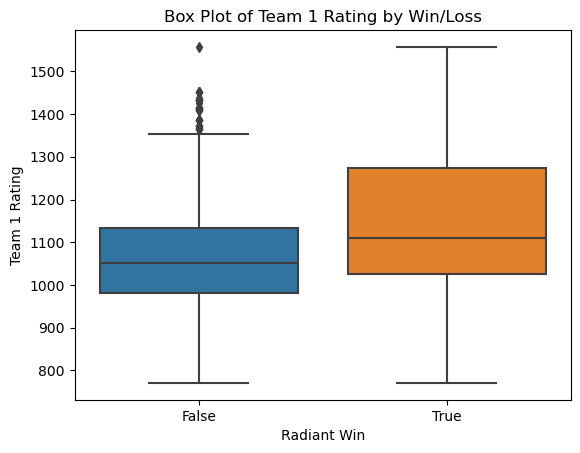

In [118]:
sns.boxplot(x='radiant_win', y='team1_rating', data=df)
plt.xlabel('Radiant Win')
plt.ylabel('Team 1 Rating')
plt.title('Box Plot of Team 1 Rating by Win/Loss')
plt.show()

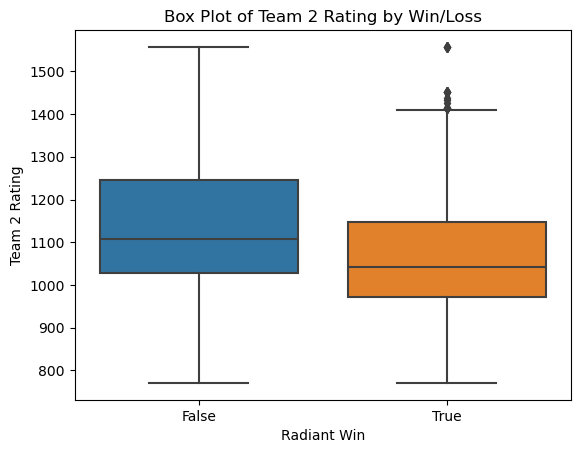

In [119]:
sns.boxplot(x='radiant_win', y='team2_rating', data=df)
plt.xlabel('Radiant Win')
plt.ylabel('Team 2 Rating')
plt.title('Box Plot of Team 2 Rating by Win/Loss')
plt.show()

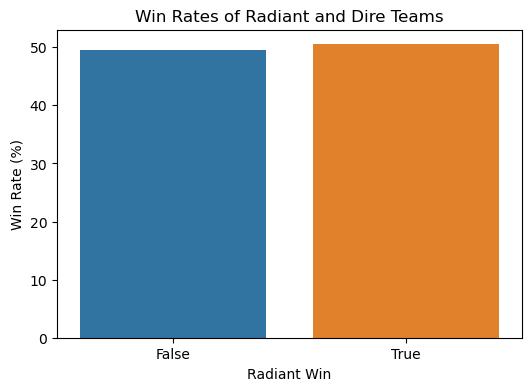

In [120]:
team_win_rates = df.groupby('radiant_win')['radiant_win'].count() / len(df) * 100

plt.figure(figsize=(6, 4))
sns.barplot(x=team_win_rates.index, y=team_win_rates.values)
plt.title('Win Rates of Radiant and Dire Teams')
plt.xlabel('Radiant Win')
plt.ylabel('Win Rate (%)')
plt.show()

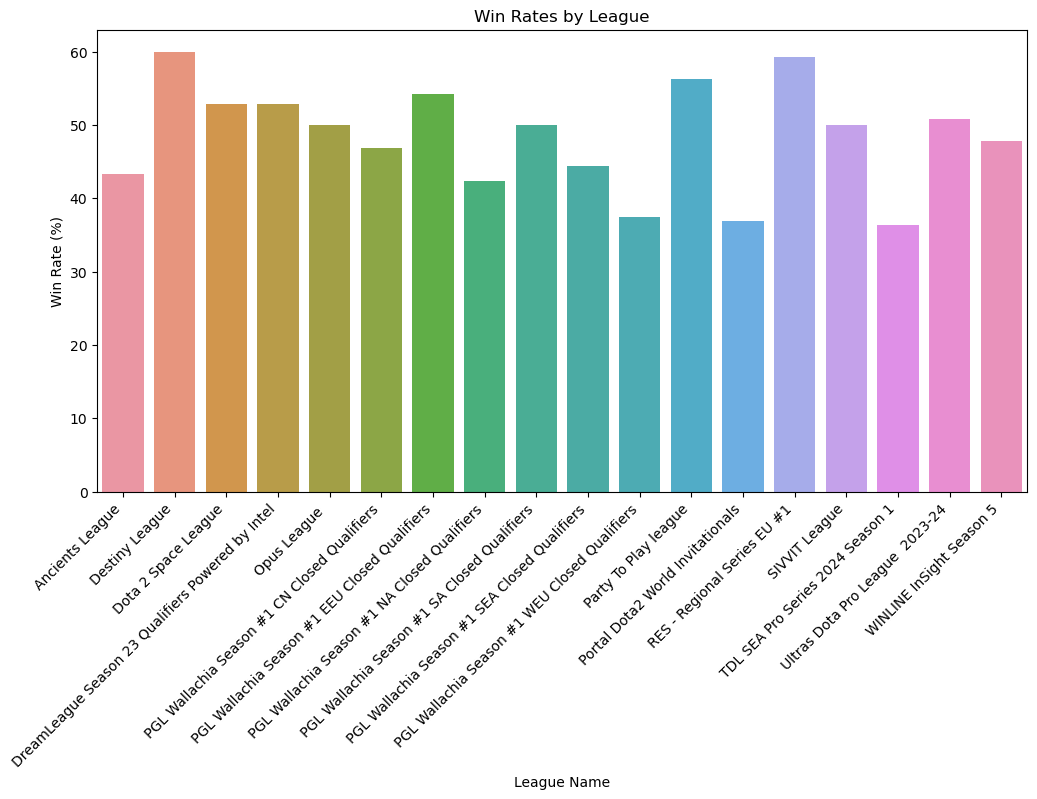

In [121]:
league_win_rates = df.groupby('league_name')['radiant_win'].mean() * 100

plt.figure(figsize=(12, 6))
sns.barplot(x=league_win_rates.index, y=league_win_rates.values)
plt.xticks(rotation=45, ha='right')
plt.title('Win Rates by Leagues')
plt.xlabel('League Name')
plt.ylabel('Win Rate (%)')
plt.show()

2024-03-31 13:14:25,917 [13320] WARNING  py.warnings:109: [JupyterRequire] C:\Users\anike\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):

2024-03-31 13:14:26,003 [13320] WARNING  py.warnings:109: [JupyterRequire] C:\Users\anike\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



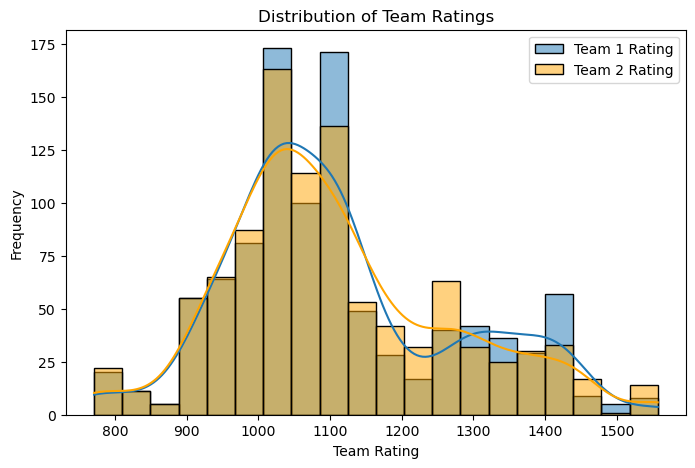

In [122]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='team1_rating', bins=20, kde=True, label='Team 1 Rating')
sns.histplot(data=df, x='team2_rating', bins=20, kde=True, label='Team 2 Rating', color='orange')
plt.title('Distribution of Team Ratings')
plt.xlabel('Team Rating')
plt.ylabel('Frequency')
plt.legend()
plt.show()

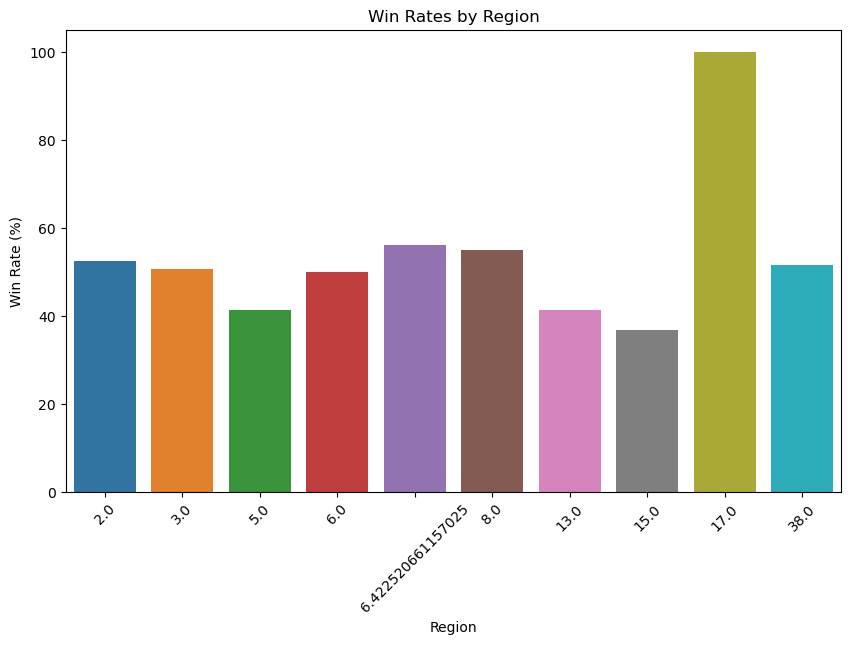

In [123]:
region_win_rates = df.groupby('region')['radiant_win'].mean() * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=region_win_rates.index, y=region_win_rates.values)
plt.title('Win Rates by Region')
plt.xlabel('Region')
plt.ylabel('Win Rate (%)')
plt.xticks(rotation=45)
plt.show()